# User Engagement Analysis

### Import Libraries and Modules

In [25]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the src directory
src_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
sys.path.insert(0, src_dir)

if 'data_loader' in sys.modules:
    del sys.modules['data_loader']
if 'user_engagement' in sys.modules:
    del sys.modules['user_engagement']

from data_loader import DataLoader
from user_engagement import UserEngagement



### Load Data from PostgreSQL and create an Object

In [26]:
loader = DataLoader()
df = loader.load_data("SELECT * FROM public.xdr_data")
cleaned_df = loader.clean_data(df)

df = cleaned_df
user_engagement = UserEngagement(df)



### User Engagement Metrics


In [27]:
# Get the top 10 customers by engagement metrics
top_customers = user_engagement.top_customers_by_engagement(n=10)

# Display top customers by each metric
print(top_customers['Top Sessions Frequency'])
print(top_customers['Top Total Session Duration'])
print(top_customers['Top Total Traffic'])

               Sessions Frequency  Total Session Duration (ms)  \
MSISDN/Number                                                    
3.362632e+10                   18                    8791927.0   
3.361489e+10                   17                    9966898.0   
3.362578e+10                   17                   18553754.0   
3.365973e+10                   16                    4035428.0   
3.367588e+10                   15                    4865947.0   
3.376054e+10                   15                    9279434.0   
3.366716e+10                   13                    8744914.0   
3.360313e+10                   12                    6287761.0   
3.378632e+10                   12                    4059652.0   
3.362708e+10                   12                    4703516.0   

               Total Download (Bytes)  Total Upload (Bytes)  \
MSISDN/Number                                                 
3.362632e+10             7.301517e+09           669650721.0   
3.361489e+10      

### User Engagement Metrics k-Means

In [28]:
customer_clusters = user_engagement.classify_customers_by_engagement()

In [29]:
customer_clusters

,Sessions Frequency,Session Duration,Total Traffic (Bytes),Cluster
MSISDN/Number,,,,
3.360100e+10,1,116720.0,8.786906e+08,0
3.360100e+10,1,181230.0,1.568596e+08,0
3.360101e+10,1,49878.0,4.223207e+08,0
3.360101e+10,2,37104.0,1.457411e+09,1
3.360101e+10,2,253983.0,6.152172e+08,1
...,...,...,...,...
3.379000e+10,1,8810.0,7.146416e+08,0
3.379000e+10,1,140988.0,4.803073e+08,0
3.197021e+12,1,877385.0,2.321240e+08,0


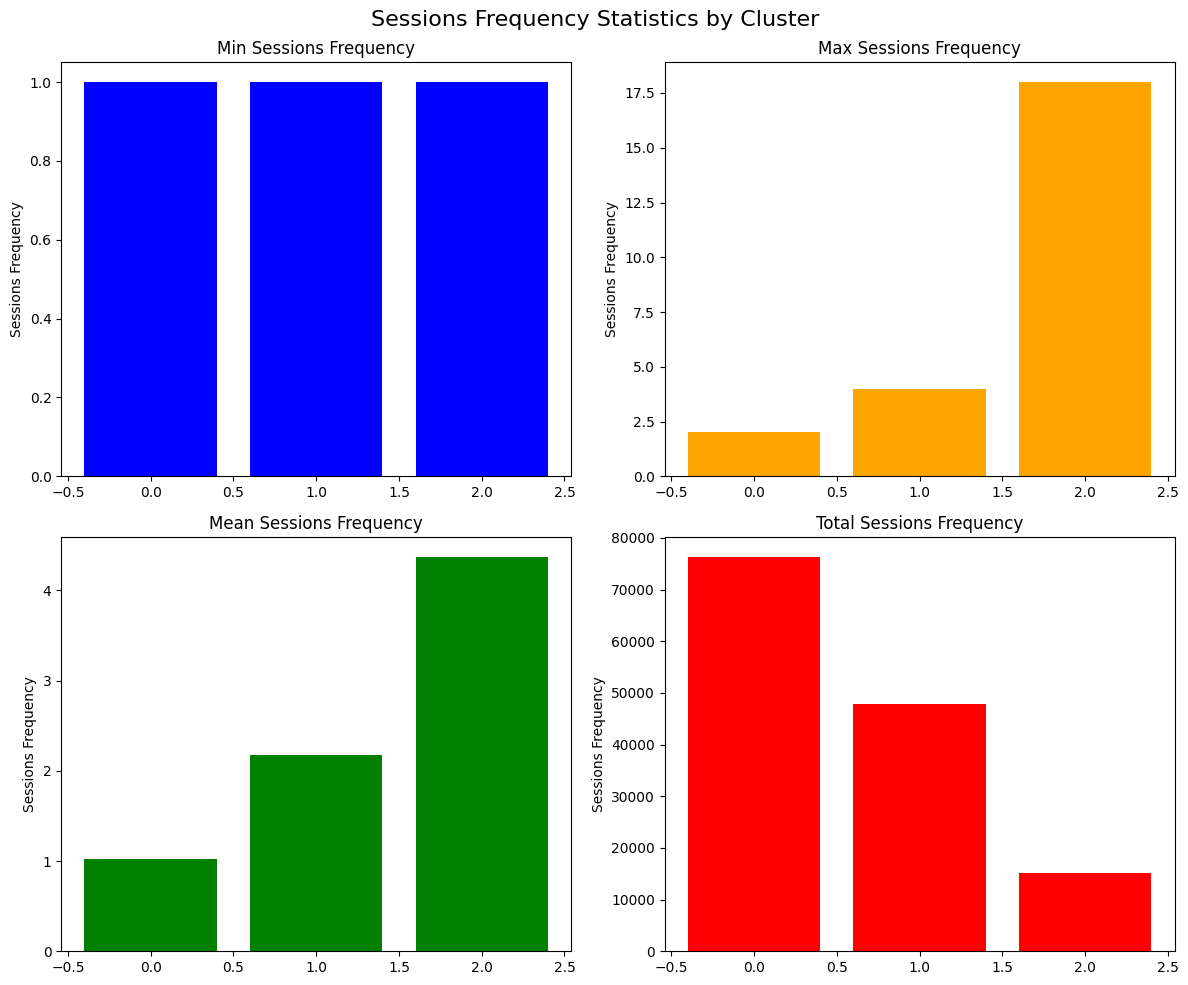

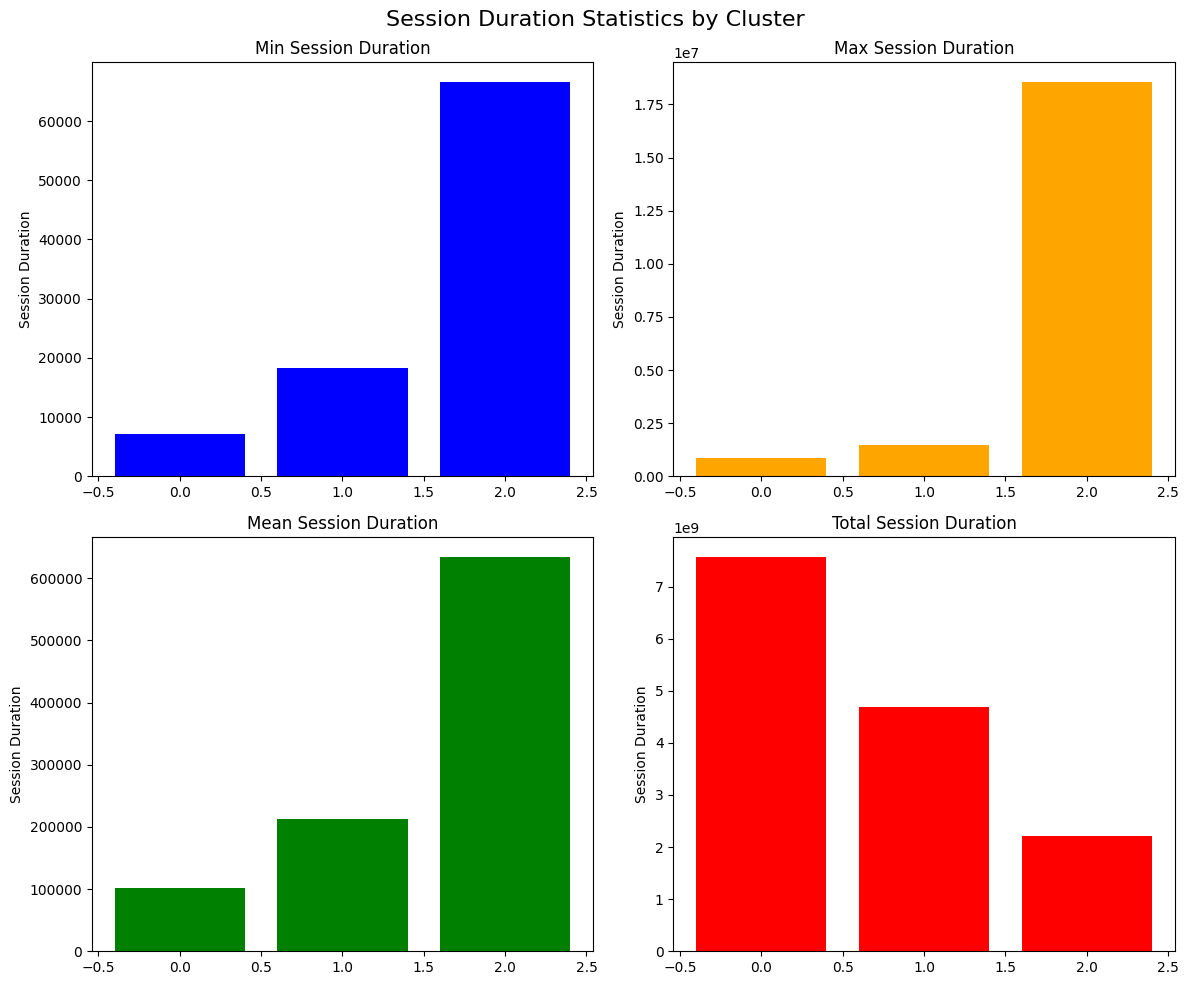

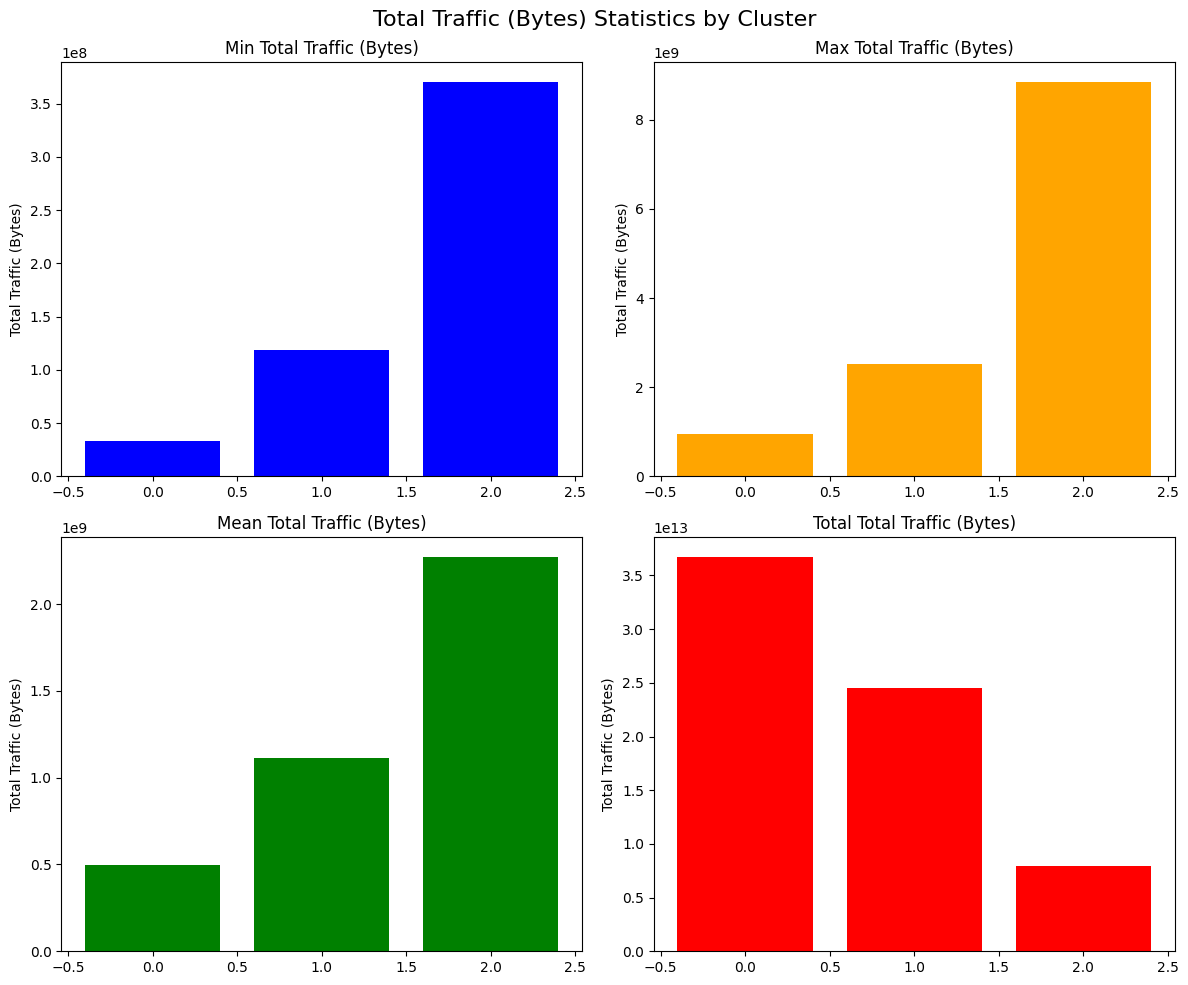

In [30]:
cluster_stats = user_engagement.analyze_clusters(customer_clusters)

### Top Users per Application

In [31]:
top_users_per_app = user_engagement.top_users_per_application()

for app, users in top_users_per_app.items():
    print(f"Top 10 users for {app}:")
    print(users)
    print("\n")

Top 10 users for Social Media:
MSISDN/Number
3.362632e+10    43374779.0
3.376054e+10    39783189.0
3.365973e+10    35412358.0
3.361489e+10    28294544.0
3.362578e+10    27135500.0
3.366716e+10    24247850.0
3.378632e+10    23974919.0
3.366907e+10    23800834.0
3.360313e+10    23077825.0
3.366553e+10    22586033.0
Name: Social Media Total (Bytes), dtype: float64


Top 10 users for Google:
MSISDN/Number
3.362632e+10    152191852.0
3.362578e+10    142307915.0
3.361489e+10    127973787.0
3.376054e+10    123223099.0
3.365973e+10    116516345.0
3.378632e+10    110254484.0
3.367588e+10    109860502.0
3.366716e+10    105032696.0
3.376127e+10     97089988.0
3.369900e+10     90983749.0
Name: Google Total (Bytes), dtype: float64


Top 10 users for Email:
MSISDN/Number
3.362632e+10    42418782.0
3.361489e+10    40788634.0
3.362578e+10    40633966.0
3.378632e+10    36310123.0
3.365973e+10    35999792.0
3.376054e+10    33693767.0
3.367588e+10    31514421.0
3.366546e+10    30417885.0
3.366716e+10    

### Top Applications

e:\Studies\tenx\w2\src\user_engagement.py:259: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_applications, x='Application', y='Total Traffic (Bytes)', palette='viridis')


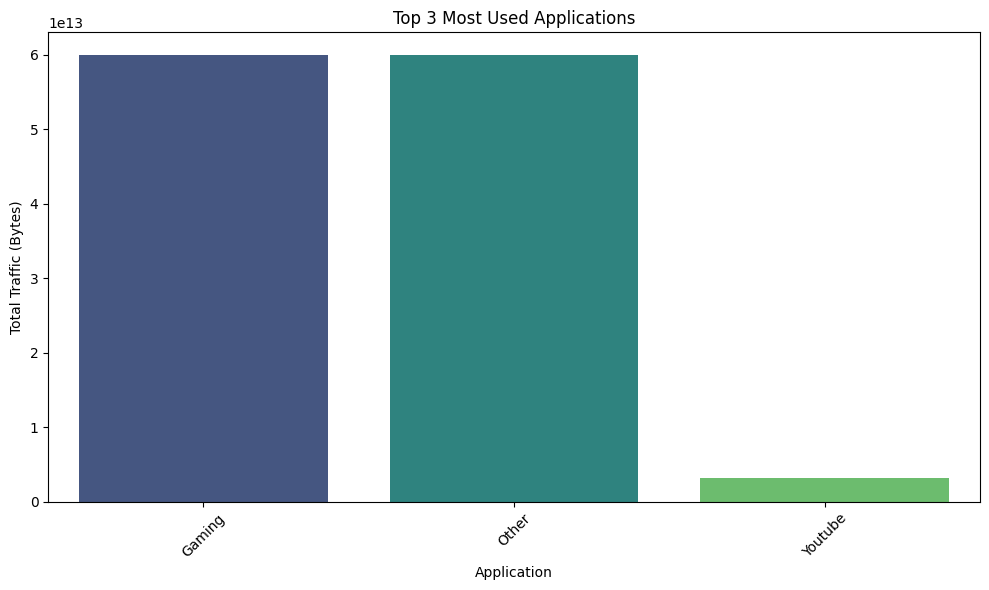

In [32]:
user_engagement.plot_top_applications()

### K-Means Optimal

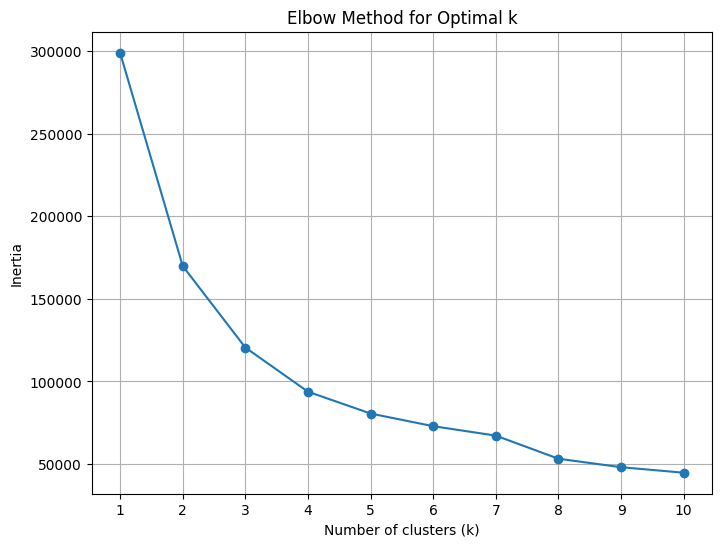

In [33]:
user_engagement.k_means_optimal()